In [4]:
import pandas as pd
import numpy as np

#CSV I have files in the same folder

school_df=pd.read_csv("file:///Users/jorg62/Desktop/schools_complete.csv")
student_df=pd.read_csv("students_complete.csv")

In [21]:
school_df.rename(columns = {'name': 'school'}, inplace = True)

#MERGING  STUDENTS WITH SCHOOL

all_df = student_df.merge(school_df, how = 'left', on = 'school')

In [3]:
#CREATE DataFrame for 

District={}

District=pd.DataFrame()

#passing grade is 70

District["Total Schools"] =[school_df.school.value_counts().sum()]
District["Total Students"] = [school_df["size"].sum()]
District["Total Budget"]=[school_df["budget"].sum()]
District["Average Math Score"]=[student_df["math_score"].mean()]
District["Average Reading Score"]=[student_df["reading_score"].mean()]

Total_Students=len(student_df["Student ID"])
math_pass=len(student_df[student_df["math_score"] >= 70])/ Total_Students
reading_pas=len(student_df[student_df["reading_score"] >= 70])/ Total_Students

overal=(math_pass+reading_pas)/2

# passing rate is 70
District["%Passing Math"]=len(student_df[student_df["math_score"] >= 70])/ Total_Students
District["%Passing Reading"]=len(student_df[student_df["reading_score"] >= 70])/ Total_Students
District["%Overall Passing Rate"]=[overal]

Districts=pd.DataFrame(District)



Districts.style.format({"Total Budget": "${:,.2f}",
                      "%Passing Math": "{:.1%}","%Passing Reading": "{:.1%}"})

Districts

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,%Passing Math,%Passing Reading,%Overall Passing Rate
0,15,39170,24649428,78.985371,81.87784,0.749809,0.858055,0.803932


In [12]:
#GROUPS by school
school = all_df.set_index('school').groupby(['school'])

types = school_df.set_index('school')['type']

# SUM students by school
student_school = all_df.groupby("school")['Student ID'].count()

# SCHOOL budget
school_budget = school_df.set_index('school')['budget']

#STUDENT  budget
student_budget = school_df.set_index('school')['budget']/school_df.set_index('school')['size']

#AVG scores by school
avg_math = school['math_score'].mean()
avg_read = school['reading_score'].mean()

# % PASSING SCORES
pass_math = all_df[all_df['math_score'] >= 70].groupby('school')['Student ID'].count()/student_school 
pass_read = all_df[all_df['reading_score'] >= 70].groupby('school')['Student ID'].count()/student_school
overall = all_df[(all_df['reading_score'] >= 70) & (all_df['math_score'] >= 70)].groupby('school')['Student ID'].count()/student_school

school_summary = pd.DataFrame({
    "School Type": types,
    "Total Students": student_school,
    "Per Student Budget": student_budget,
    "Total School Budget": school_budget,
    "Average Math Score": avg_math,
    "Average Reading Score": avg_read,
    '% Passing Math': pass_math,
    '% Passing Reading': pass_read,
    "Overall Passing Rate": overall
})




#munging
school_summary = school_summary[['School Type', 
                          'Total Students', 
                          'Total School Budget', 
                          'Per Student Budget', 
                          'Average Math Score', 
                          'Average Reading Score',
                          '% Passing Math',
                          '% Passing Reading',
                          'Overall Passing Rate']]

#formatting
school_summary.style.format({'Total Students': '{:,}', 
                          "Total School Budget": "${:,}", 
                          "Per Student Budget": "${:.0f}",
                          'Average Math Score': "{:.1f}", 
                          'Average Reading Score': "{:.1f}", 
                          "% Passing Math": "{:.1%}", 
                          "% Passing Reading": "{:.1%}", 
                          "Overall Passing Rate": "{:.1%}"})

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
Bailey High School,District,"4,976","$3,124,928",$628,77.0,81.0,66.7%,81.9%,54.6%
Cabrera High School,Charter,"1,858","$1,081,356",$582,83.1,84.0,94.1%,97.0%,91.3%
Figueroa High School,District,"2,949","$1,884,411",$639,76.7,81.2,66.0%,80.7%,53.2%
Ford High School,District,"2,739","$1,763,916",$644,77.1,80.7,68.3%,79.3%,54.3%
Griffin High School,Charter,"1,468","$917,500",$625,83.4,83.8,93.4%,97.1%,90.6%
Hernandez High School,District,"4,635","$3,022,020",$652,77.3,80.9,66.8%,80.9%,53.5%
Holden High School,Charter,427,"$248,087",$581,83.8,83.8,92.5%,96.3%,89.2%
Huang High School,District,"2,917","$1,910,635",$655,76.6,81.2,65.7%,81.3%,53.5%
Johnson High School,District,"4,761","$3,094,650",$650,77.1,81.0,66.1%,81.2%,53.5%
Pena High School,Charter,962,"$585,858",$609,83.8,84.0,94.6%,95.9%,90.5%


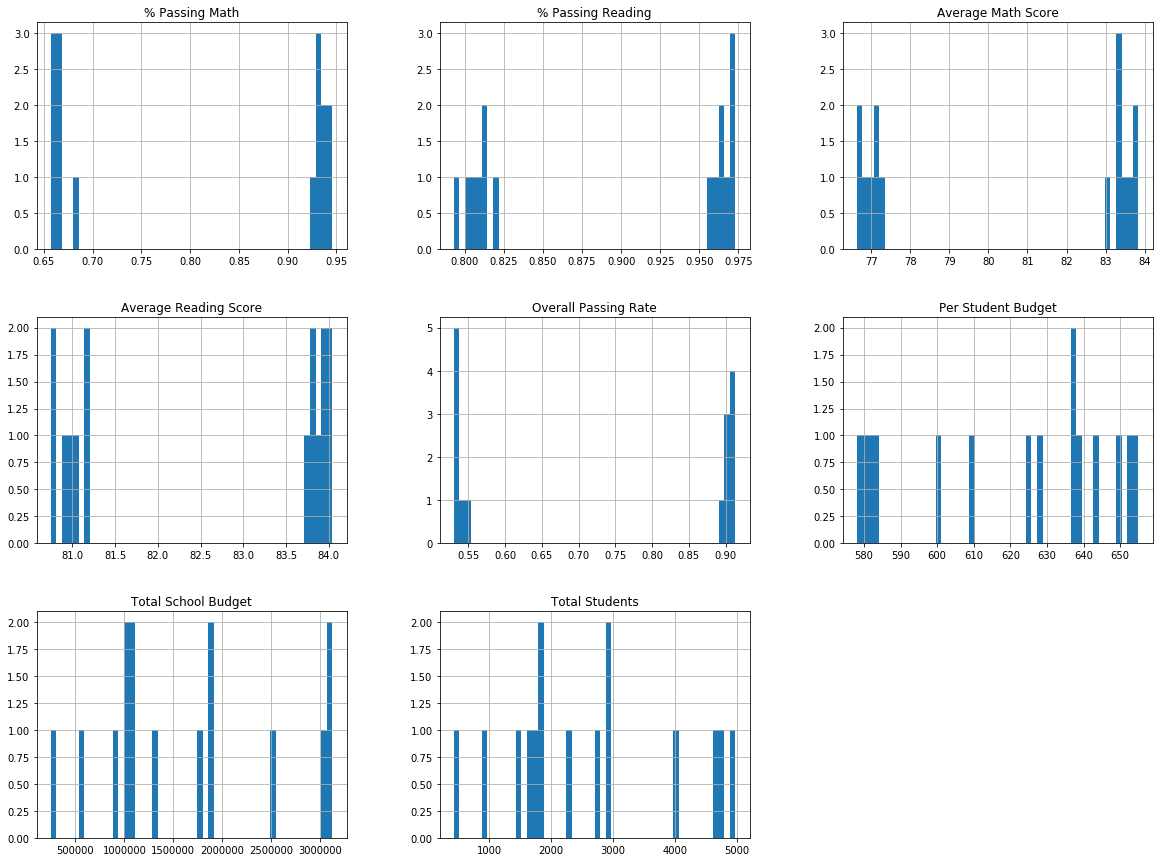

In [23]:
#school_summary.head()
#graphic summary per head LOOKING THE CLEAR NUMBERS %
import matplotlib.pyplot as plt
school_summary.hist(bins=50, figsize=(20,15))
plt.show()

In [13]:
TOP5=school_summary.sort_values("Overall Passing Rate", ascending = False)


TOP5.style.format({'Total Students': '{:,}',
                           "Total School Budget": "${:,}", 
                           "Per Student Budget": "${:.0f}", 
                           "% Passing Math": "{:.1%}", 
                           "% Passing Reading": "{:.1%}", 
                           "Overall Passing Rate": "{:.1%}"})



TOP5.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,0.941335,0.970398,0.913348
Thomas High School,Charter,1635,1043130,638.0,83.418349,83.848930,0.932722,0.973089,0.909480
Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757,0.933924,0.971390,0.905995
Wilson High School,Charter,2283,1319574,578.0,83.274201,83.989488,0.938677,0.965396,0.905826
Pena High School,Charter,962,585858,609.0,83.839917,84.044699,0.945946,0.959459,0.905405


In [14]:
#tail has last 5 rows and since it was sorted on top5 we use tail
Bottom_5 = TOP5.tail()
# now soritng to show the worst fisrt 
Bottom_5 = Bottom_5.sort_values('Overall Passing Rate')
Bottom_5.style.format({'Total Students': '{:,}', 
                       "Total School Budget": "${:,}", 
                       "Per Student Budget": "${:.0f}", 
                       "% Passing Math": "{:.1%}", 
                       "% Passing Reading": "{:.1%}", 
                       "Overall Passing Rate": "{:.1%}"})
Bottom_5.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
Rodriguez High School,District,3999,2547363,637.0,76.842711,80.744686,0.663666,0.802201,0.529882
Figueroa High School,District,2949,1884411,639.0,76.711767,81.158020,0.659885,0.807392,0.532045
Huang High School,District,2917,1910635,655.0,76.629414,81.182722,0.656839,0.813164,0.535139
Hernandez High School,District,4635,3022020,652.0,77.289752,80.934412,0.667530,0.808630,0.535275
Johnson High School,District,4761,3094650,650.0,77.072464,80.966394,0.660576,0.812224,0.535392


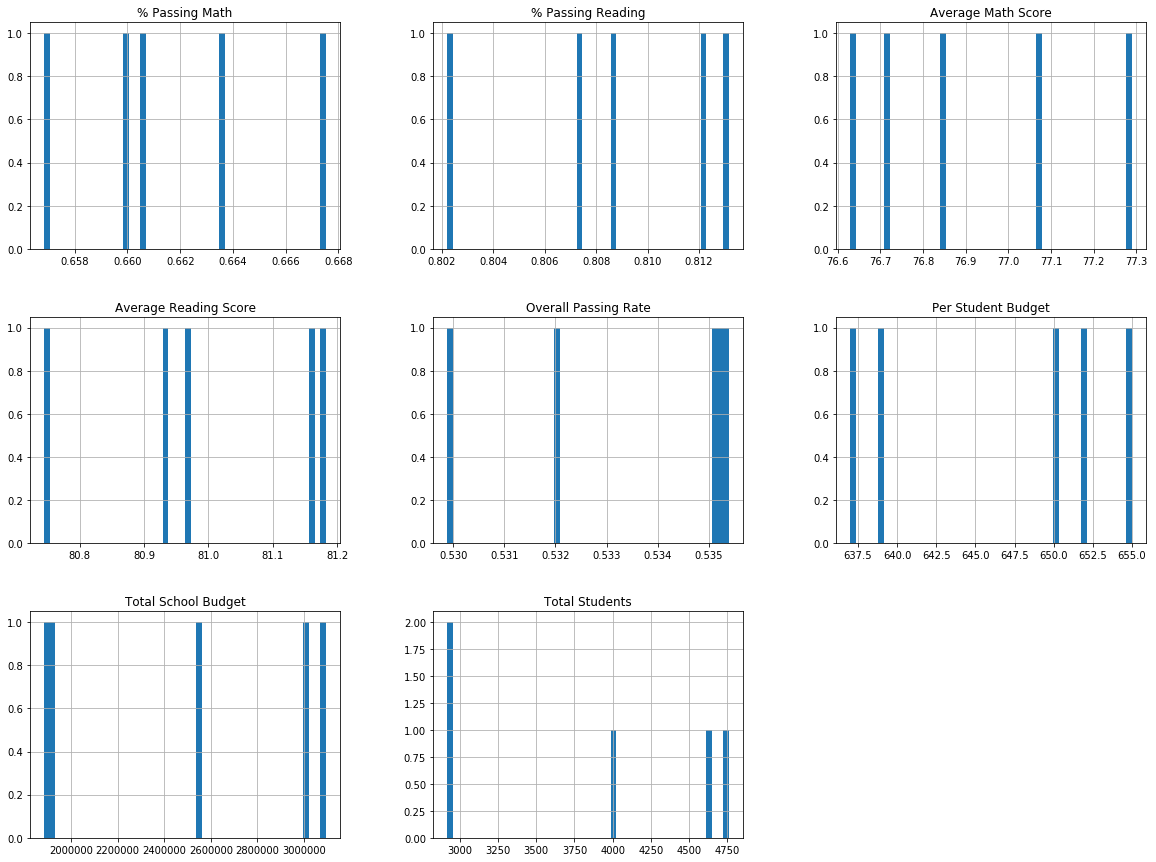

In [30]:
import matplotlib.pyplot as plt
Bottom_5.hist(bins=50, figsize=(20,15))
plt.show()

In [15]:
#creates grade level average math scores for each school 
ninth_math = student_df.loc[student_df['grade'] == '9th'].groupby('school')["math_score"].mean()
tenth_math = student_df.loc[student_df['grade'] == '10th'].groupby('school')["math_score"].mean()
eleventh_math = student_df.loc[student_df['grade'] == '11th'].groupby('school')["math_score"].mean()
twelfth_math = student_df.loc[student_df['grade'] == '12th'].groupby('school')["math_score"].mean()

math_scores = pd.DataFrame({
        "9th": ninth_math,
        "10th": tenth_math,
        "11th": eleventh_math,
        "12th": twelfth_math
})
math_scores = math_scores[['9th', '10th', '11th', '12th']]
math_scores.index.name = "School"

#show and format
math_scores.style.format({'9th': '{:.1f}', 
                          "10th": '{:.1f}', 
                          "11th": "{:.1f}", 
                          "12th": "{:.1f}"})

,9th,10th,11th,12th
School,,,,
Bailey High School,77.1,77.0,77.5,76.5
Cabrera High School,83.1,83.2,82.8,83.3
Figueroa High School,76.4,76.5,76.9,77.2
Ford High School,77.4,77.7,76.9,76.2
Griffin High School,82.0,84.2,83.8,83.4
Hernandez High School,77.4,77.3,77.1,77.2
Holden High School,83.8,83.4,85.0,82.9
Huang High School,77.0,75.9,76.4,77.2
Johnson High School,77.2,76.7,77.5,76.9


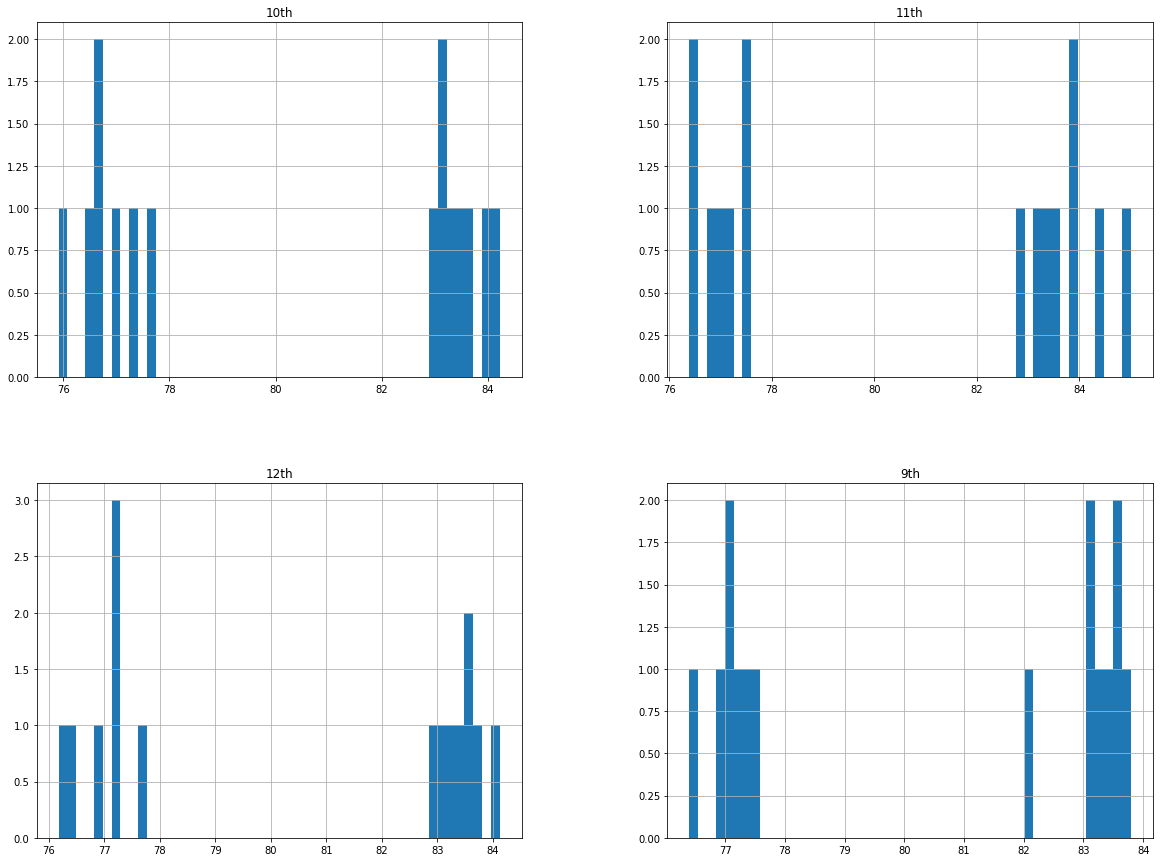

In [24]:
import matplotlib.pyplot as plt
math_scores.hist(bins=50, figsize=(20,15))
plt.show()

In [16]:
#creates grade level average reading scores for each school
ninth_reading = student_df.loc[student_df['grade'] == '9th'].groupby('school')["reading_score"].mean()
tenth_reading = student_df.loc[student_df['grade'] == '10th'].groupby('school')["reading_score"].mean()
eleventh_reading = student_df.loc[student_df['grade'] == '11th'].groupby('school')["reading_score"].mean()
twelfth_reading = student_df.loc[student_df['grade'] == '12th'].groupby('school')["reading_score"].mean()

#merges the reading score averages by school and grade together
reading_scores = pd.DataFrame({
        "9th": ninth_reading,
        "10th": tenth_reading,
        "11th": eleventh_reading,
        "12th": twelfth_reading
})
reading_scores = reading_scores[['9th', '10th', '11th', '12th']]
reading_scores.index.name = "School"

#format
reading_scores.style.format({'9th': '{:.1f}', 
                             "10th": '{:.1f}', 
                             "11th": "{:.1f}", 
                             "12th": "{:.1f}"})

,9th,10th,11th,12th
School,,,,
Bailey High School,81.3,80.9,80.9,80.9
Cabrera High School,83.7,84.3,83.8,84.3
Figueroa High School,81.2,81.4,80.6,81.4
Ford High School,80.6,81.3,80.4,80.7
Griffin High School,83.4,83.7,84.3,84.0
Hernandez High School,80.9,80.7,81.4,80.9
Holden High School,83.7,83.3,83.8,84.7
Huang High School,81.3,81.5,81.4,80.3
Johnson High School,81.3,80.8,80.6,81.2


In [ ]:
#CREATE spending bins
bins = [0, 584.999, 614.999, 644.999, 999999]
group_name = ['< $585', "$585 - 614", "$615 - 644", "> $644"]
all_df['spending_bins'] = pd.cut(all_df['budget']/all_df['size'], bins, labels = group_name)

#GROU-spending
by_spending = all_df.groupby('spending_bins')

#CALCULATIONS
avg_math = by_spending['math_score'].mean()
avg_read = by_spending['reading_score'].mean()
pass_math = all_df[all_df['math_score'] >= 70].groupby('spending_bins')['Student ID'].count()/by_spending['Student ID'].count()
pass_read = all_df[all_df['reading_score'] >= 70].groupby('spending_bins')['Student ID'].count()/by_spending['Student ID'].count()
overall = all_df[(all_df['reading_score'] >= 70) & (allScores by School Size_df['math_score'] >= 70)].groupby('spending_bins')['Student ID'].count()/by_spending['Student ID'].count()

            
# df            
scores_by_spend = pd.DataFrame({
    "Average Math Score": avg_math,
    "Average Reading Score": avg_read,
    '% Passing Math': pass_math,
    '% Passing Reading': pass_read,
    "Overall Passing Rate": overall
            
})
            
#REORDER-columns
scores_by_spend = scores_by_spend[[
    "Average Math Score",
    "Average Reading Score",
    '% Passing Math',
    '% Passing Reading',
    "Overall Passing Rate"
]]

scores_by_spend.index.name = "Per Student Budget"
scores_by_spend = scores_by_spend.reindex(group_name)

#FORMATING 
scores_by_spend.style.format({'Average Math Score': '{:.1f}', 
                              'Average Reading Score': '{:.1f}', 
                              '% Passing Math': '{:.1%}', 
                              '% Passing Reading':'{:.1%}', 
                              'Overall Passing Rate': '{:.1%}'})

In [ ]:
bins = [0, 999, 1999, 99999999999]
group_name = ["Small (<1000)", "Medium (1000-2000)" , "Large (>2000)"]
all_df['size_bins'] = pd.cut(all_df['size'], bins, labels = group_name)

#GROUP by spending
by_size = all_df.groupby('size_bins')

#CALCULATIONS
avg_math = by_size['math_score'].mean()
avg_read = by_size['math_score'].mean()
pass_math = all_df[allScores by School Type_df['math_score'] >= 70].groupby('size_bins')['Student ID'].count()/by_size['Student ID'].count()
pass_read = all_df[all_df['reading_score'] >= 70].groupby('size_bins')['Student ID'].count()/by_size['Student ID'].count()
overall = all_df[(all_df['reading_score'] >= 70) & (all_df['math_score'] >= 70)].groupby('size_bins')['Student ID'].count()/by_size['Student ID'].count()

            
# df BUILD           
scores_by_size = pd.DataFrame({
    "Average Math Score": avg_math,
    "Average Reading Score": avg_read,
    '% Passing Math': pass_math,
    '% Passing Reading': pass_read,
    "Overall Passing Rate": overall
            
})
            
#REORDER COLUMNS
scores_by_size = scores_by_size[[
    "Average Math Score",
    "Average Reading Score",
    '% Passing Math',
    '% Passing Reading',
    "Overall Passing Rate"
]]

scores_by_size.index.name = "Total Students"
scores_by_size = scores_by_size.reindex(group_name)

#FORMATING
scores_by_size.style.format({'Average Math Score': '{:.1f}', 
                              'Average Reading Score': '{:.1f}', 
                              '% Passing Math': '{:.1%}', 
                              '% Passing Reading':'{:.1%}', 
                              'Overall Passing Rate': '{:.1%}'})

In [31]:
by_type = all_df.groupby("type")

#CALCULATIONS AVG
avg_math = by_type['math_score'].mean()
avg_read = by_type['math_score'].mean()
pass_math = all_df[all_df['math_score'] >= 70].groupby('type')['Student ID'].count()/by_type['Student ID'].count()
pass_read = all_df[all_df['reading_score'] >= 70].groupby('type')['Student ID'].count()/by_type['Student ID'].count()
overall = all_df[(all_df['reading_score'] >= 70) & (all_df['math_score'] >= 70)].groupby('type')['Student ID'].count()/by_type['Student ID'].count()

# df BUILD           
scores_by_type = pd.DataFrame({
    "Average Math Score": avg_math,
    "Average Reading Score": avg_read,
    '% Passing Math': pass_math,
    '% Passing Reading': pass_read,
    "Overall Passing Rate": overall})
    
#REORDER COLUMNS
scores_by_type = scores_by_type[[
    "Average Math Score",
    "Average Reading Score",
    '% Passing Math',
    '% Passing Reading',
    "Overall Passing Rate"
]]
scores_by_type.index.name = "Type of School"


# FORMATING 
scores_by_type.style.format({'Average Math Score': '{:.1f}', 
                              'Average Reading Score': '{:.1f}', 
                              '% Passing Math': '{:.1%}', 
                              '% Passing Reading':'{:.1%}', 
                              'Overall Passing Rate': '{:.1%}'})

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
Type of School,,,,,
Charter,83.4,83.4,93.7%,96.6%,90.6%
District,77.0,77.0,66.5%,80.9%,53.7%


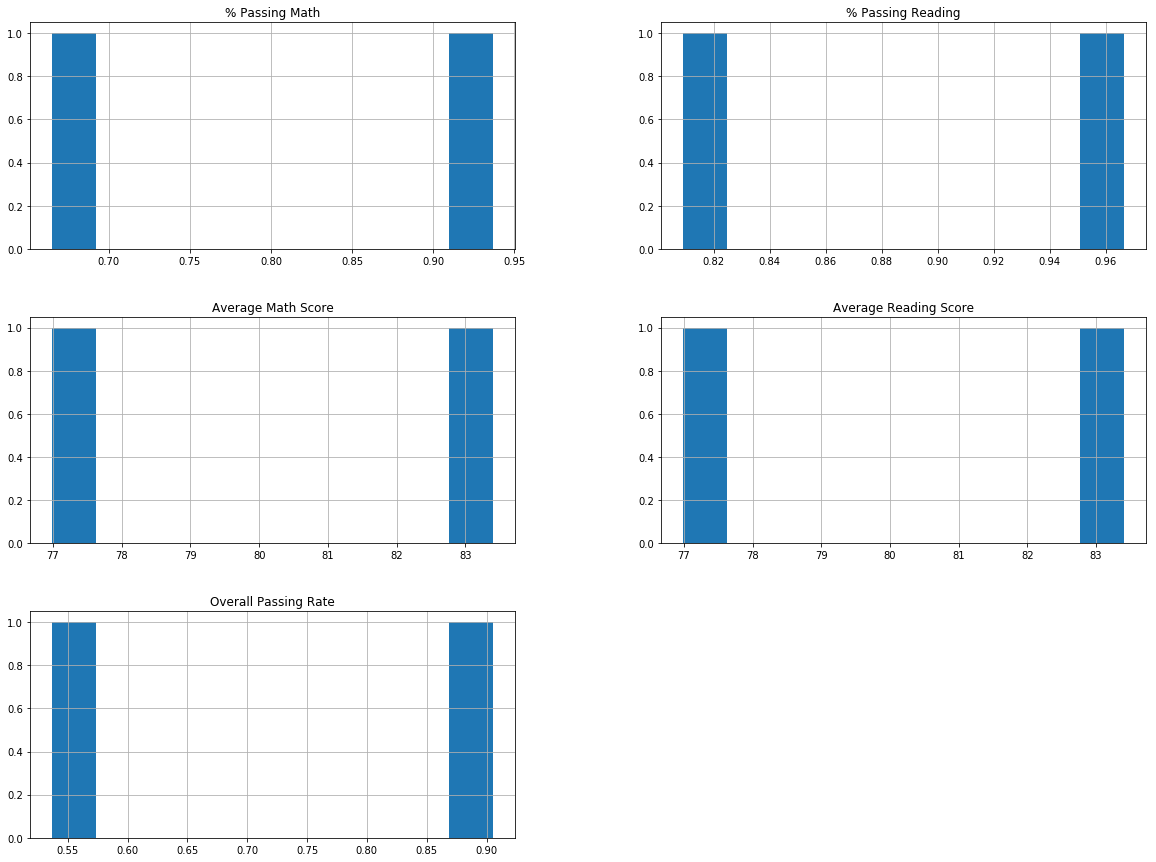

In [37]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

scores_by_type.hist(bins=10, figsize=(20,15))
plt.show()

In [ ]:
Schools under 2000 students have much higher passing rates than those with student populations above 2000. A comparision of 95 to 75%. The same phenomenon is seen with high and low per student spending brackets and district versus charter schools.